# Задание 7

собрать свой датасет изображений (штук по 20) и сделать на нем трансфер лернинг

In [43]:
import random
import albumentations as A
import cv2
from matplotlib import pyplot as plt
import random
import numpy as np
import pandas as pd

### Аугментация изображений

#### Случайное преобразование одного изображения

In [67]:
# варианты аугментаций
blur = ['AdvancedBlur', 'Blur', 'GaussianBlur', 'GlassBlur']
noise = ['GaussNoise', 'ISONoise', 'MultiplicativeNoise']
sharpen = ['sharpen']
colors = ['ToGray', 'ToSepia']
transforms = ['SafeRotate', 'Transpose', 'VerticalFlip']

augmentations = [blur, noise, sharpen, colors, transforms]

augs_choices = {'blur': 0.0, 'noise': 0.0, 'sharpen': 0.0, 'colors': 0.0, 'transforms': 0.0}

# Функция восстановления значений вероятностей до единицы
def recover_augs_choices():
    keys = augs_choices.keys()
    for key in keys:
        augs_choices[key] = 1.0

# Функция установки определенных вероятностей для преобразований
def set_augs_choices(blurc, noisec, sharpenc, colorsc, transformsc):
    augs_choices['blur'] = blurc
    augs_choices['noise'] = noisec
    augs_choices['sharpen'] = sharpenc
    augs_choices['colors'] = colorsc
    augs_choices['transforms'] = transformsc

# Изменение на константу кроме одного преобразования
def change_aug_choices(choice, C):
    tmp = augs_choices[choice]
    augs_choices['blur'] *= C
    augs_choices['noise'] *= C
    augs_choices['sharpen'] *= C
    augs_choices['colors'] *= C
    augs_choices['transforms'] *= C
    augs_choices[choice] = tmp

# Случайные вероятности преобразований
def random_aug_choices():
    r1 = random.randint(0, 100) * 0.01
    r2 = random.randint(0, 100) * 0.01
    r3 = random.randint(0, 100) * 0.01
    r4 = random.randint(0, 100) * 0.01
    r5 = random.randint(0, 100) * 0.01
    set_augs_choices(r1, r2, r3, r4, r5)

# Функция выбора случайных преобразований из групп
def random_augs():
    blurr = augmentations[0][random.randint(0, len(augmentations[0])-1)]
    noiser = augmentations[1][random.randint(0, len(augmentations[1])-1)]
    sharpenr = augmentations[2][random.randint(0, len(augmentations[2])-1)]
    colorsr = augmentations[3][random.randint(0, len(augmentations[3])-1)]
    transformr = augmentations[4][random.randint(0, len(augmentations[4])-1)]
    return [blurr, noiser, sharpenr, colorsr, transformr]

# аугментация из одной функции
def get_aug_array(aug_name, image, p):
    if aug_name == 'AdvancedBlur': return [A.AdvancedBlur(p=p)]
    if aug_name == 'Blur': return [A.Blur(p=p)]
    if aug_name == 'GaussianBlur': return [A.GaussianBlur(p=p)]
    if aug_name == 'GlassBlur': return [A.GlassBlur(p=p)]

    if aug_name == 'GaussNoise': return [A.GaussNoise(p=p)]
    if aug_name == 'ISONoise': return [A.ISONoise(p=p)]
    if aug_name == 'MultiplicativeNoise': return [A.MultiplicativeNoise(p=p)]

    if aug_name == 'sharpen': return [A.Sharpen(p=p)]

    if aug_name == 'ToGray': return [A.ToGray(p=p)]
    if aug_name == 'ToSepia': return [A.ToSepia(p=p)]

    if aug_name == 'SafeRotate': return [A.SafeRotate(p=p)]
    if aug_name == 'Transpose': return [A.Transpose(p=p)]
    if aug_name == 'VerticalFlip': return [A.VerticalFlip(p=p)]

# применение преобразования
def transform_image(aug_name, image, p):
    tr_array = get_aug_array(aug_name, image, p)
    transform = A.Compose(tr_array)
    transformed = transform(image=image)
    return transformed["image"]

Тест

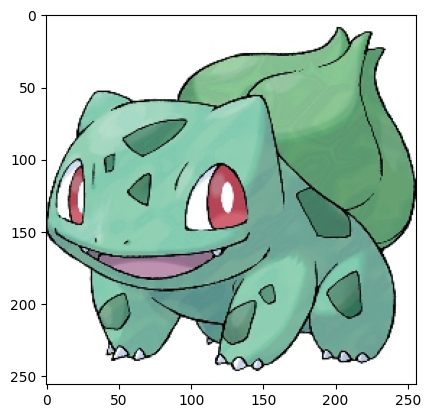

In [68]:
image = cv2.imread("DATASET_origin/Bulbasaur/1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Test aug: ToGray


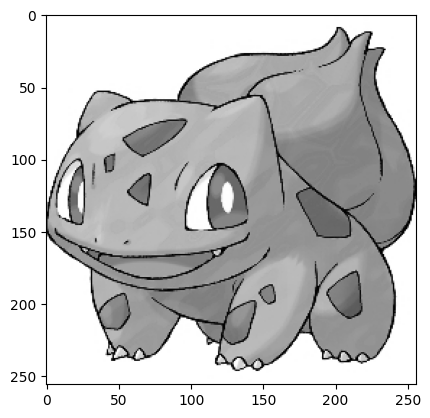

In [69]:
test_augs = random_augs()
aug = test_augs[random.randint(0, len(test_augs)-1)]
print("Test aug:", aug)
new_image = transform_image(aug, image, 1)
plt.imshow(new_image)
plt.show()

#### Построение функции аугментации для целой папки изображений

Основные функции

In [70]:
import os.path

def get_images_in_dir(cur_dir):
    # хранит абсолютные пути до изображений в данной папке
    paths_to_files = []

    # формирует путь до изображений в определенной папке
    path_to_cur_dir = "DATASET_origin/"
    path_to_cur_dir += cur_dir

    # обходит заданный калатог
    for address, _, files in os.walk(path_to_cur_dir):
        for name in files:
            paths_to_files.append(os.path.join(address, name))
    return paths_to_files

def get_images_in_dir_output(cur_dir):
    # хранит абсолютные пути до изображений в данной папке
    paths_to_files = []

    # формирует путь до изображений в определенной папке
    path_to_cur_dir = "OUTPUT/"
    path_to_cur_dir += cur_dir

    # обходит заданный калатог
    for address, _, files in os.walk(path_to_cur_dir):
        for name in files:
            paths_to_files.append(os.path.join(address, name))
    return paths_to_files

# Функция получения названия преобразования
def get_aug_name(idx):
    if idx == 0: return 'blur'
    if idx == 1: return 'noise'
    if idx == 2: return 'sharpen'
    if idx == 3: return 'colors'
    if idx == 4: return 'transforms'

# Функция открытия рандомного изображения, применения к нему рандомной аугментации до 3 раз и сохранение в папку
from PIL import Image

def open_and_transform(img_paths, target_dir):
    rnum = random.randint(0, len(img_paths)-1)
    image = cv2.imread(img_paths[rnum])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # случайные вероятности применения преобразований
    random_aug_choices()
    # рандомное количество аугментаций
    amount = random.randint(1, 4)
    target_new_dir = target_dir
    for i in range(amount):
        # новый список преобразований
        augs = random_augs()
        # конкретное преобразование по номеру
        aug_num = random.randint(0, len(augs)-1)
        # группа преобразования
        aug_group = get_aug_name(aug_num)
        # название преобразования
        aug = augs[aug_num]
        # применение преобразования
        new_image = transform_image(aug, image, augs_choices[aug_group])
        # изменение вероятностей
        change_aug_choices(aug_group, 0.9)
        # сохранение изображения в директорию
        im = Image.fromarray(new_image)
        im_name = "/image" + str(random.randint(0, 100000)) + ".jpg"
        target_new_dir += im_name
        im.save(target_new_dir)
        target_new_dir = target_dir

Перенос исходных изображений

In [71]:
# Директории для вывода/ввода
path_to_input = r"DATASET_origin/"
path_to_output = r"OUTPUT/"

var_dirs = ["Bulbasaur", "Charmander", "Cyndaquil", "Gastly", "Mewtwo", "Pidgey", "Pikachu", "Squirtle"]

# Создаем таргетные папки для варианта
for dirname in var_dirs:
    # получаем имя таргетной папки
    new_dir = path_to_output + "OUT_" + dirname
    # создаем ее
    os.mkdir(new_dir)

# Переносим в таргетные папки оригинальные изображения
for dirname in var_dirs:
    # получаем имя таргетной папки
    new_dir = path_to_output + "OUT_" + dirname
    # получаем список оригинальных изображений
    images_paths = get_images_in_dir(dirname)
    # копируем изображения в таргет
    for image_name in images_paths:
        # открываем изображение в источнике
        image = cv2.imread(image_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(image)
        # сохраняем в таргет
        im_name = "original" + str(random.randint(0, 100000)) + ".jpg"
        new_img_path = new_dir + "/" + im_name
        image.save(new_img_path)

Главная функция для аугментации

In [72]:
def augmentation_one_dir(dirpath, dirname, fixed_size, n):
    # получаем список изображений
    images_paths = get_images_in_dir(dirname)
    # получаем путь до таргетной папки
    target_dirname = "OUT_" + dirname
    target_dirpath = path_to_output + target_dirname
    # если в таргетной папке должно быть n изображений
    if fixed_size:
        # получаем текущее количество изображений в папке
        current_size = len(get_images_in_dir_output(target_dirname))
        # совершаем аугментацию над случайным изображением
        while current_size < n:
            open_and_transform(images_paths, target_dirpath)
            current_size = len(get_images_in_dir_output(target_dirname))
        # удаляем лишние изображения, если есть
        if current_size != n:
            # список всех изображений
            cur_iamges = get_images_in_dir_output(target_dirname)
            # разница в количестве
            disp = len(cur_iamges) - n
            # удаляем изображения с конца
            for i in range(disp):
                img_to_del = cur_iamges[i]
                os.remove(img_to_del)
    else:
        # получаем текущее количество изображений в папке
        current_size = len(get_images_in_dir_output(target_dirname))
        target_size = current_size * n
        # совершаем аугментацию над случайным изображением
        while current_size < target_size:
            open_and_transform(images_paths, target_dirpath)
            current_size = len(get_images_in_dir_output(target_dirname))
        # удаляем лишние изображения, если есть
        if current_size != target_size:
            # список всех изображений
            cur_iamges = get_images_in_dir_output(target_dirname)
            # разница в количестве
            disp = len(cur_iamges) - target_size
            # удаляем изображения с конца
            for i in range(disp):
                img_to_del = cur_iamges[i]
                os.remove(img_to_del)

Применение аугментации

In [73]:
for dirname in var_dirs:
    dir_out = 'OUT_' + dirname
    dirpath = path_to_input + dirname
    print("ДИРЕКТОРИЯ:", dirpath)
    print("Количество изображений до:", len(get_images_in_dir_output(dir_out)))
    augmentation_one_dir(dirpath, dirname, True, 100)
    print("Количество изображений после:", len(get_images_in_dir_output(dir_out)))

ДИРЕКТОРИЯ: DATASET_origin/Bulbasaur
Количество изображений до: 4
Количество изображений после: 100
ДИРЕКТОРИЯ: DATASET_origin/Charmander
Количество изображений до: 5
Количество изображений после: 100
ДИРЕКТОРИЯ: DATASET_origin/Cyndaquil
Количество изображений до: 3
Количество изображений после: 100
ДИРЕКТОРИЯ: DATASET_origin/Gastly
Количество изображений до: 4
Количество изображений после: 100
ДИРЕКТОРИЯ: DATASET_origin/Mewtwo
Количество изображений до: 3
Количество изображений после: 100
ДИРЕКТОРИЯ: DATASET_origin/Pidgey
Количество изображений до: 4
Количество изображений после: 100
ДИРЕКТОРИЯ: DATASET_origin/Pikachu
Количество изображений до: 7
Количество изображений после: 100
ДИРЕКТОРИЯ: DATASET_origin/Squirtle
Количество изображений до: 4
Количество изображений после: 100


### Transfer Learning

Библиотеки

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import InceptionV3
from keras.optimizers import Adam

Разделение выборки

In [74]:
# import splitfolders
# input_folder = "OUTPUT"
# output = "DATASET_forTF"
# splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .2, .1))

Необходимые переменные

In [17]:
# Каталог с данными для обучения
train_dir = 'DATASET_forTF/train'
# Каталог с данными для проверки
val_dir = 'DATASET_forTF/val'
# Каталог с данными для тестирования
test_dir = 'DATASET_forTF/test'
# Размеры изображения
img_width, img_height = 256, 256
# Размерность тензора на основе изображения для входных данных в нейронную сеть
input_shape = (img_width, img_height, 3)
# Размер мини-выборки
batch_size = 3
# Количество изображений для обучения
nb_train_samples = 560
# Количество изображений для проверки
nb_validation_samples = 160
# Количество изображений для тестирования
nb_test_samples = 80

Загрузка нейронной сети InceptionV3

In [18]:
net = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)

# замораживаем веса
net.trainable = False

Дополнение нейронной сети

In [19]:
model = Sequential()
# Добавляем в модель сеть InceptionV3 вместо слоя
model.add(net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# восемь итоговых классов изображений
model.add(Dense(8))
model.add(Activation('softmax'))

Информация о модели

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               18874624  
                                                                 
 activation_286 (Activation)  (None, 256)              0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 8)                 2056      
                                                                 
 activation_287 (Activation)  (None, 8)               

Компиляция модели

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

#### Создание генератора изображений для обучения

In [22]:
# делит значения всех пикселов изображения на 255
datagen = ImageDataGenerator(rescale=1. / 255)

# Генератор данных для обучения
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# генератор для валидации
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# генератор для тестирования
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 560 images belonging to 8 classes.
Found 160 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


#### Обучение модели

In [23]:
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=3,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/3
186/186 [==============================] - 39s 183ms/step - loss: 0.7690 - accuracy: 0.7504 - val_loss: 0.1658 - val_accuracy: 0.9560
Epoch 2/3
186/186 [==============================] - 34s 180ms/step - loss: 0.1122 - accuracy: 0.9713 - val_loss: 0.1231 - val_accuracy: 0.9497
Epoch 3/3
186/186 [==============================] - 36s 196ms/step - loss: 0.0374 - accuracy: 0.9946 - val_loss: 0.1209 - val_accuracy: 0.9623


#### Оценка модели

In [25]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("accuracy на тестовых данных: %.2f%%" % (scores[1]*100))

C:\Users\illus\AppData\Local\Temp\ipykernel_11724\1674365955.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


accuracy на тестовых данных: 94.87%
